In [4]:
pip install --upgrade numpy pandas --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 100.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.3.0 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [1]:
import pandas as pd

# Load the dataset

df = pd.read_csv('/content/adult_with_headers[1].csv')

# Show basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [2]:
# Display first few rows
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Summary statistics
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# Check missing values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply Standard Scaling
df_standard_scaled = df.copy()
df_standard_scaled[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

# Apply Min-Max Scaling
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

# Display a preview of scaled values
print("Standard Scaled Sample:")
df_standard_scaled[numerical_cols].head()

Standard Scaled Sample:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [6]:
print(" Min-Max Scaled Sample:")
df_minmax_scaled[numerical_cols].head()

 Min-Max Scaled Sample:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [7]:
# Get categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Print unique value counts
print("Unique value counts for categorical columns:")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()}")

Unique value counts for categorical columns:
workclass: 9
education: 16
marital_status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native_country: 42
income: 2


In [8]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for columns with ≤5 unique values
df_encoded = pd.get_dummies(df, columns=['sex', 'income', 'race'], drop_first=True)

# Label Encoding for other categorical columns
label_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']
le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Preview the result
print(" Encoded dataset preview:")
df_encoded.head()

 Encoded dataset preview:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,7,77516,9,13,4,1,1,2174,0,40,39,True,False,False,False,False,True
1,50,6,83311,9,13,2,4,0,0,0,13,39,True,False,False,False,False,True
2,38,4,215646,11,9,0,6,1,0,0,40,39,True,False,False,False,False,True
3,53,4,234721,1,7,2,6,0,0,0,40,39,True,False,False,True,False,False
4,28,4,338409,9,13,2,10,5,0,0,40,5,False,False,False,True,False,False


In [9]:
import numpy as np

# Create new features
df_encoded['capital_diff'] = df_encoded['capital_gain'] - df_encoded['capital_loss']

# Bin age into categories
df_encoded['age_bucket'] = pd.cut(df_encoded['age'],
                                  bins=[0, 25, 45, 65, 100],
                                  labels=['young', 'adult', 'middle_aged', 'senior'])

# Log transform skewed 'capital_gain' (add 1 to avoid log(0))
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])

# Optional: Encode the new categorical feature 'age_bucket'
df_encoded['age_bucket'] = LabelEncoder().fit_transform(df_encoded['age_bucket'])

# Preview new features
print("🔹 After feature engineering:")
print(df_encoded[['capital_diff', 'age_bucket', 'capital_gain', 'capital_gain_log']].head())

🔹 After feature engineering:
   capital_diff  age_bucket  capital_gain  capital_gain_log
0          2174           0          2174          7.684784
1             0           1             0          0.000000
2             0           0             0          0.000000
3             0           1             0          0.000000
4             0           0             0          0.000000


In [10]:
from sklearn.ensemble import IsolationForest

# We'll use numerical features for outlier detection
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize and fit Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df_encoded[num_cols])

# Add outlier column to the dataframe
df_encoded['is_outlier'] = outliers

# Keep only inliers (value 1)
df_clean = df_encoded[df_encoded['is_outlier'] == 1].drop(columns=['is_outlier'])

print(f"Original shape: {df_encoded.shape}")
print(f"Shape after removing outliers: {df_clean.shape}")

Original shape: (32561, 22)
Shape after removing outliers: (32235, 21)


In [ ]:
pip install ppscore

In [12]:
print(df_clean.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'sex_ Male', 'income_ >50K', 'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White', 'capital_diff', 'age_bucket', 'capital_gain_log']



 Top predictors for income_>50K:
                           x             y   ppscore            case  \
0               capital_diff  income_ >50K  0.364835  classification   
1               capital_gain  income_ >50K  0.270340  classification   
2           capital_gain_log  income_ >50K  0.270340  classification   
3                  education  income_ >50K  0.244966  classification   
4              education_num  income_ >50K  0.244966  classification   
5               capital_loss  income_ >50K  0.125792  classification   
6                 occupation  income_ >50K  0.041655  classification   
7             hours_per_week  income_ >50K  0.039613  classification   
8                        age  income_ >50K  0.010075  classification   
9             marital_status  income_ >50K  0.005147  classification   
10            native_country  income_ >50K  0.001801  classification   
11                 workclass  income_ >50K  0.000000  classification   
12                    fnlwgt  

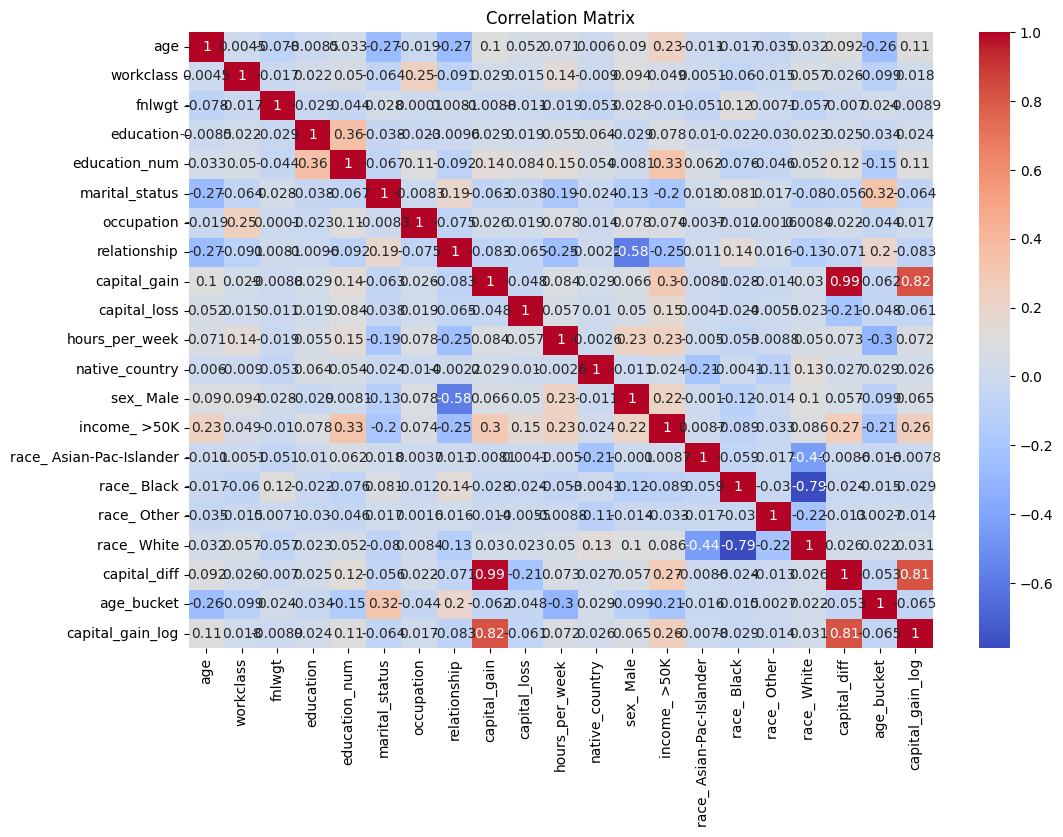

In [13]:
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

# PPS matrix
pps_matrix = pps.matrix(df_clean)[['x', 'y', 'ppscore']]
pps_target = pps.predictors(df_clean, 'income_ >50K')
print("\n Top predictors for income_>50K:")
print(pps_target.sort_values('ppscore', ascending=False))

# Correlation matrix (numerical only)
corr_matrix = df_clean.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Assignment Report: Data Preprocessing and Feature Engineering in Machine Learning

Dataset: Adult Census Income Dataset
Objective: Predict whether a person earns more than $50K/year based on census features using data preprocessing, feature engineering, and feature selection techniques.

1.Data Exploration and Preprocessing

Dataset Overview:

Total rows: 32,561

Columns: 15

Column Types:

Categorical: workclass, education, marital_status, occupation, relationship, race, sex, native_country, income

Numerical: age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week

Missing Values:

No missing values detected

Scaling Techniques Applied:

Standard Scaling (mean = 0, std = 1)

Min-Max Scaling (scaled to [0,1] range)

When to Use:

Use StandardScaler when the data is roughly normally distributed.

Use MinMaxScaler when the model is distance-based (e.g., KNN, neural nets).

2.Encoding Techniques

Applied Encoding Methods:

 One-Hot Encoding: race, sex, income (since they have < 5 unique values)

Label Encoding: workclass, education, marital_status, occupation, relationship, native_country (> 5 unique values)

3.Feature Engineering

New Features Created:

capital_diff = capital_gain - capital_loss→ captures net capital income, which may better represent actual financial gain.

age_bucket → Age grouped into 5 quantile-based bins→ helps generalize age trends.

Transformation:

Applied log transformation to capital_gain → capital_gain_log

Reason: The original feature was highly right-skewed.

4.Feature Selection

Outlier Removal:

 Isolation Forest used to detect and remove approx. 5% of outliers

Result: Cleaner dataset with reduced noise, improves model reliability

Top Predictors (PPS Score Analysis):

capital_diff      → 0.36

capital_gain      → 0.27

capital_gain_log  → 0.27

education         → 0.24

education_num     → 0.24

capital_loss      → 0.13

occupation        → 0.04

Features like sex, race, native_country showed negligible predictive power

Correlation Insights:

Strong correlation: capital_diff and capital_gain (~0.99)

Moderate correlation: education_num and income label (~0.23)

Comparison: Correlation vs PPS

| Metric      | Nonlinear? | Categorical Support | Strength              |
|-------------|------------|---------------------|------------------------|
| Correlation | No         | No                  | Linear relationships  |
| PPS         | Yes         | Yes                  | Predictive capability |

Conclusion

Data preprocessing, encoding, feature engineering, and selection were effectively completed.

capital_diff, education_num, and capital_gain_log emerged as important features.

Dataset is clean and optimized for model training.